# Librería

In [119]:
# Tratamiento de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, \
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix

# Data

In [120]:
URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(URL, index_col='PassengerId')

# Primera Exploración

In [121]:
df = titanic.copy()

In [122]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [125]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [126]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
Cabin,204,147,B96 B98,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


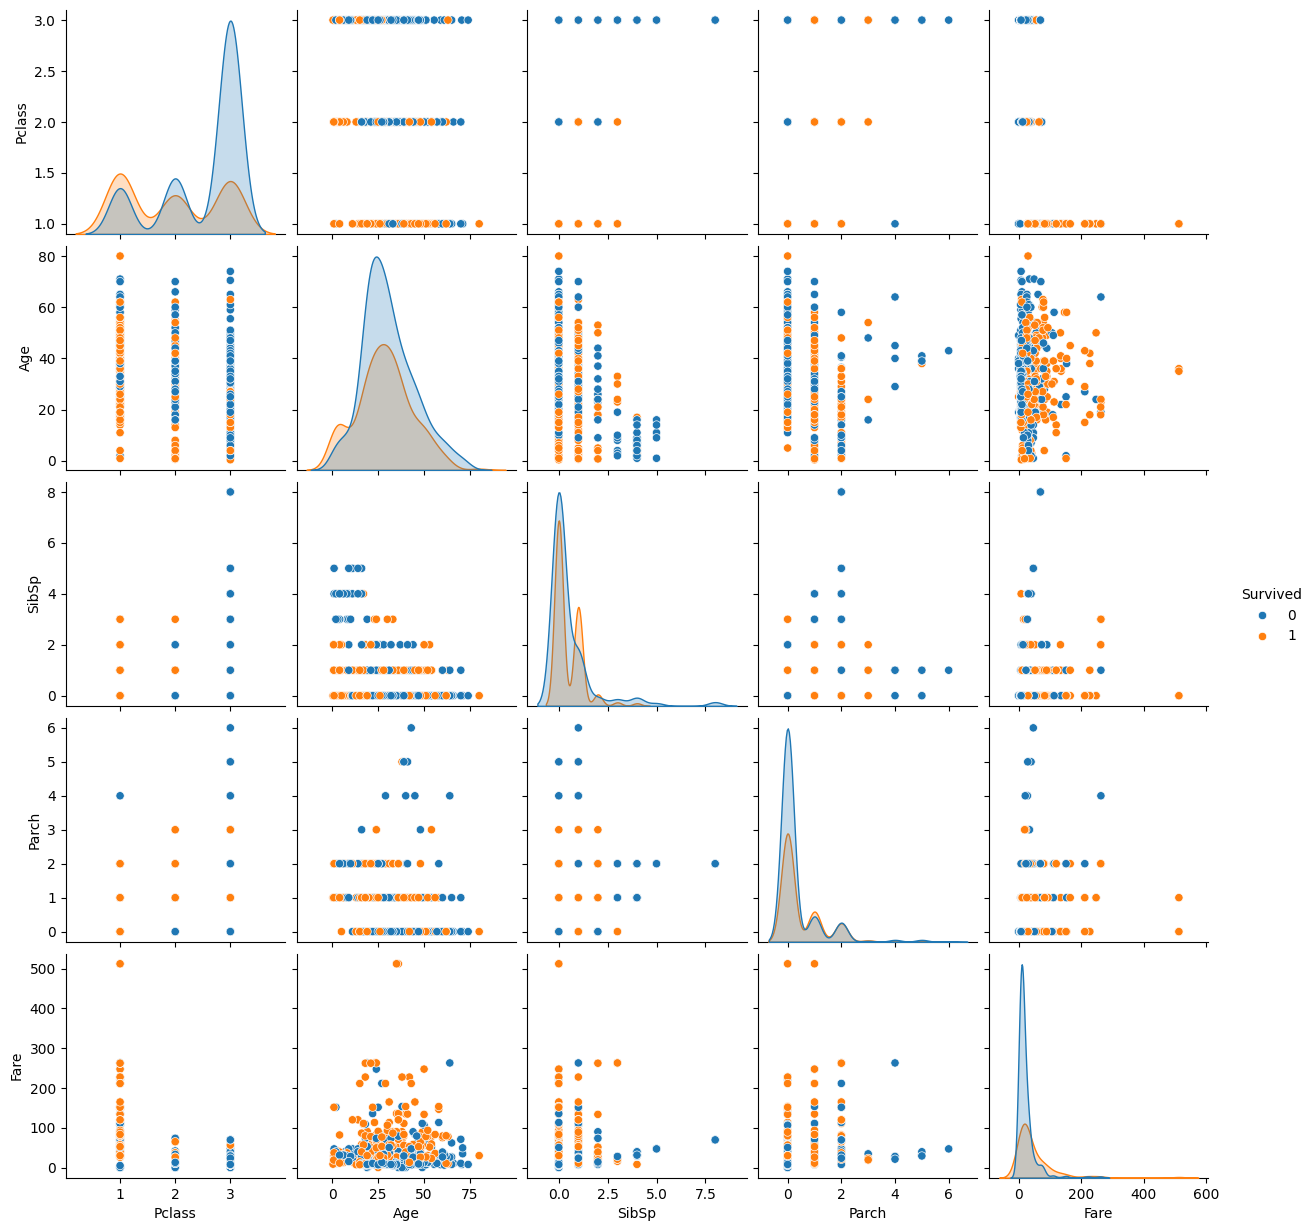

In [127]:
sns.pairplot(df, hue='Survived')

# Mini EDA

In [128]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [129]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [130]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

| 0   Survived  891 non-null    int64  
| 1   Pclass    891 non-null    int64  
| 2   Name      891 non-null    object 
| 3   Sex       891 non-null    object 
| 4   Age       714 non-null    float64
| 5   SibSp     891 non-null    int64  
| 6   Parch     891 non-null    int64  
| 7   Ticket    891 non-null    object 
| 8   Fare      891 non-null    float64
| 9   Cabin     204 non-null    object 
| 10  Embarked  889 non-null    object 

<Axes: >

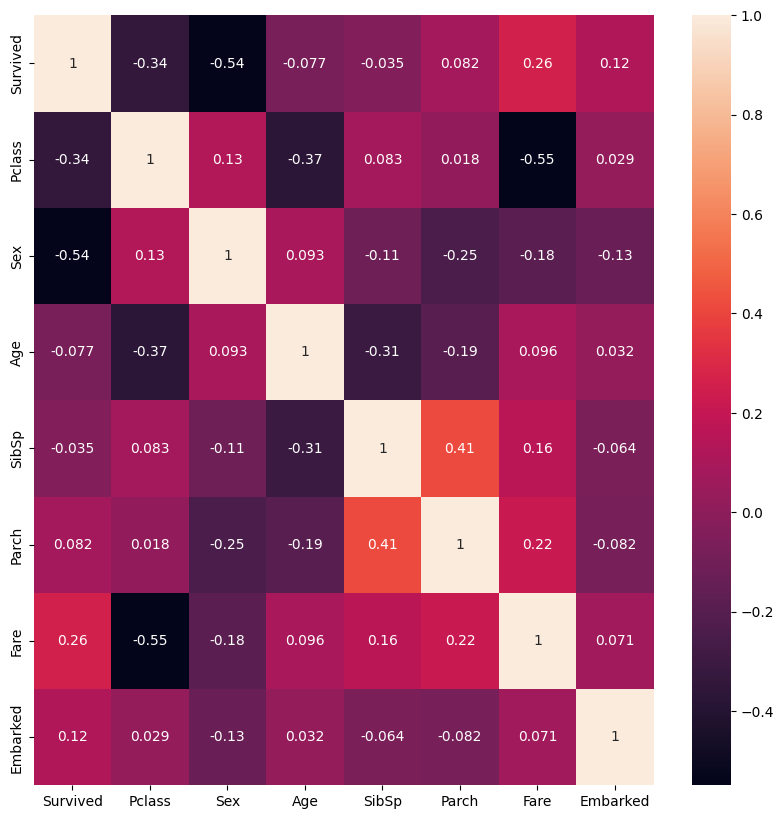

In [131]:
plt.figure(figsize=(10,10))
df_heatmap = df.copy()
df_heatmap['Sex'] = df_heatmap['Sex'].replace({'female':0, 'male':1})
df_heatmap['Sex'] = df_heatmap['Sex'].astype('int64')
df_heatmap['Embarked'] = df_heatmap['Embarked'].replace({'S':0, 'C': 1, 'Q':2, np.nan:3})
df_heatmap['Embarked'] = df_heatmap['Embarked'].astype('int64')
df_heatmap = df_heatmap.drop(['Name', 'Ticket', 'Cabin'], axis=1)
sns.heatmap(df_heatmap.corr(numeric_only=True), annot=True)

<Axes: xlabel='Survived', ylabel='percent'>

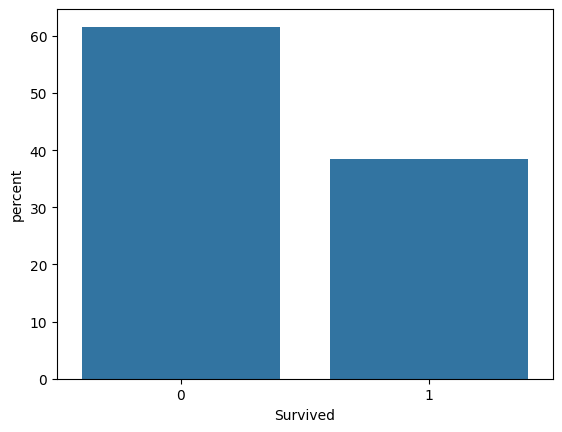

In [132]:
sns.countplot(x='Survived', data=df, stat='percent')

In [133]:
df.shape

(891, 11)

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

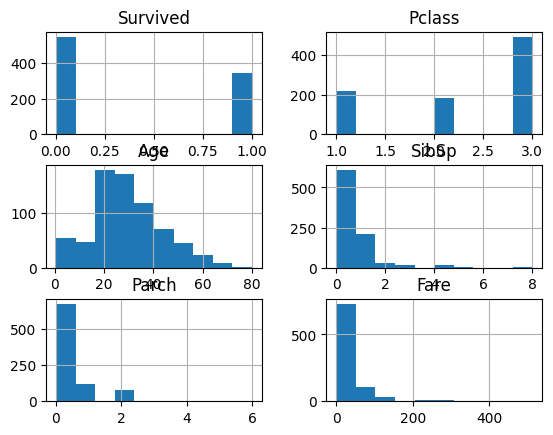

In [134]:
df.hist()

In [135]:
df[df.isna().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


# Tratamiento de missing y valores atípicos

In [136]:
df = df.drop('Cabin', axis=1)


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [138]:

# df[df['Name'].str.contains('Master.')].shape # Estos son niños 40 filas
# df[df['Name'].str.contains('Miss.')] # Estas son niñas 182 filas
# df[df['Name'].str.contains('Mr.')] # estos son varones 521 filas
# df[df['Name'].str.contains('Mrs.')] # esto son mujeres 129 filas

df2 = df[df['Name'].str.contains('Mr. ')]

df2[df['Sex'] == 'female']

# sum([40, 182, 521, 129])



C:\Users\cgdo2\AppData\Local\Temp\ipykernel_98612\2242350471.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[df['Sex'] == 'female']


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,S
428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,S
557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,C
711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C


In [139]:
df2[df2.duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,


In [144]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

mean_male = df[df['Name'].str.contains('Mr. ')]['Age'].mean()
mean_female = df[df['Name'].str.contains('Mrs.')]['Age'].mean()
mean_children_male = df[df['Name'].str.contains('Master.')]['Age'].mean()
mean_children_female = df[df['Name'].str.contains('Miss.')]['Age'].mean()

is_male = df[df[df['Name'].str.contains('Mr. ')] != -1]
is_female = df[df['Name'].str.contains('Mrs.')]
is_children_male = df[df['Name'].str.contains('Master.')]
is_children_female = df[df['Name'].str.contains('Miss.')]

is_nan = df['Age'].isna()

print(is_male)

df['Age'].loc[is_male & is_nan] = mean_male
df['Age'].loc[is_female & is_nan] = mean_female
df['Age'].loc[is_children_male & is_nan] = mean_children_male
df['Age'].loc[is_children_female & is_nan] = mean_children_female

             Survived  Pclass                      Name   Sex   Age  SibSp  \
PassengerId                                                                  
1                 0.0     3.0   Braund, Mr. Owen Harris  male  22.0    1.0   
2                 NaN     NaN                       NaN   NaN   NaN    NaN   
3                 NaN     NaN                       NaN   NaN   NaN    NaN   
4                 NaN     NaN                       NaN   NaN   NaN    NaN   
5                 0.0     3.0  Allen, Mr. William Henry  male  35.0    0.0   
...               ...     ...                       ...   ...   ...    ...   
887               NaN     NaN                       NaN   NaN   NaN    NaN   
888               NaN     NaN                       NaN   NaN   NaN    NaN   
889               NaN     NaN                       NaN   NaN   NaN    NaN   
890               1.0     1.0     Behr, Mr. Karl Howell  male  26.0    0.0   
891               0.0     3.0       Dooley, Mr. Patrick  male  3

TypeError: unsupported operand type(s) for &: 'float' and 'bool'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

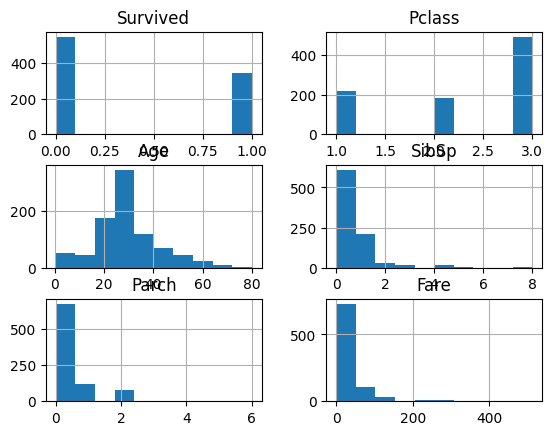

In [23]:
df.hist()

In [24]:
df = df.drop(['Name', 'Ticket'], axis=1)

# Feature Engineer

In [31]:
# Crear una columna para unir las columnas SibSp y Parch y si suman más de 1 va acompañado, y sino va solo
# Columna si son niños

def es_nino(edad):
  """
  Función que devuelve True si la edad es menor o igual a 18, False en caso contrario.

  Args:
    edad: La edad de la persona.

  Returns:
    True si la persona es un niño, False en caso contrario.
  """
  return edad <= 16


df['Children'] = np.vectorize(es_nino)(df["Age"])

In [35]:
def no_solo(SibSp, Parch):
  """
  Función que devuelve True si al menos uno de los valores de las edades es mayor a 0, False en caso contrario.

  Args:
    edad1: La edad de la primera persona.
    edad2: La edad de la segunda persona.

  Returns:
    True si al menos una de las personas está acompañada, False en caso contrario.
  """
  return SibSp > 0 or Parch > 0

# Añadimos una nueva columna llamada "Acompañado" al dataframe
df["no_alone"] = np.vectorize(no_solo)(df["SibSp"], df["Parch"])

In [38]:
df.drop(['SibSp', 'Parch'], axis=1)

,Survived,Pclass,Sex,Age,Fare,Embarked,Children,no_alone
PassengerId,,,,,,,,
1,0,3,male,22.000000,7.2500,S,False,True
2,1,1,female,38.000000,71.2833,C,False,True
3,1,3,female,26.000000,7.9250,S,False,False
4,1,1,female,35.000000,53.1000,S,False,True
5,0,3,male,35.000000,8.0500,S,False,False
...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,13.0000,S,False,False
888,1,1,female,19.000000,30.0000,S,False,False
889,0,3,female,27.915709,23.4500,S,False,True


In [36]:
df['Children'].astype('int8')
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Children,no_alone
PassengerId,,,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S,False,True
2,1,1,female,38.000000,1,0,71.2833,C,False,True
3,1,3,female,26.000000,0,0,7.9250,S,False,False
4,1,1,female,35.000000,1,0,53.1000,S,False,True
5,0,3,male,35.000000,0,0,8.0500,S,False,False
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S,False,False
888,1,1,female,19.000000,0,0,30.0000,S,False,False
889,0,3,female,27.915709,1,2,23.4500,S,False,True


# División de Datos

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Survived'), df['Survived'], test_size=0.2, random_state=42)

# Escalado + Dummies

In [39]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [42]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(X_train[['Sex', 'Embarked']])

transformed_X_train = ohe.transform(X_train[['Sex', 'Embarked']])
transformed_df = pd.DataFrame(transformed_X_train, columns=ohe.get_feature_names_out(['Sex', 'Embarked']), index=X_train.index)
X_train_sca_ohe = pd.concat([X_train, transformed_df], axis=1).drop(columns=['Sex', 'Embarked'])

transformed_X_val = ohe.transform(X_test[['Sex', 'Embarked']])
transformed_df = pd.DataFrame(transformed_X_val, columns=ohe.get_feature_names_out(['Sex', 'Embarked']), index=X_test.index)
X_test_sca_ohe = pd.concat([X_test, transformed_df], axis=1).drop(columns=['Sex', 'Embarked'])

c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
X_train_sca_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 332 to 103
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      712 non-null    int64  
 1   Age         712 non-null    float64
 2   SibSp       712 non-null    int64  
 3   Parch       712 non-null    int64  
 4   Fare        712 non-null    float64
 5   Children    712 non-null    bool   
 6   no_alone    712 non-null    bool   
 7   Sex_female  712 non-null    float64
 8   Sex_male    712 non-null    float64
 9   Embarked_C  712 non-null    float64
 10  Embarked_Q  712 non-null    float64
 11  Embarked_S  712 non-null    float64
dtypes: bool(2), float64(7), int64(3)
memory usage: 62.6 KB


# Cross-Validation + Base-Lines

# Entrenar

In [44]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
    ]
)
voting_clf.fit(X_train_sca_ohe, y_train)

c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [45]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test_sca_ohe, y_test))

lr = 0.8100558659217877
rf = 0.8156424581005587
svc = 0.659217877094972


# Predicción

In [46]:
voting_clf.score(X_test_sca_ohe, y_test)

0.8044692737430168

In [47]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_train_sca_ohe, y_train)
voting_clf.score(X_test_sca_ohe, y_test)

c:\Users\cgdo2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8044692737430168

# Validación del modelo